In [1]:
%load_ext autoreload
%autoreload 2

import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import minimize
import linearRegression_1
import math
import random

from mcmc import mcmc
import densities
import my_problemLR

%matplotlib notebook


### LEAST SQUARED METHOD 

In [2]:
# create artificial data
n = 100
x=np.random.rand(n)
# We want to guess the slope + intercept of the line of equation y=a*x+b
a=2.
b=1.
y = a*x + b + np.random.randn(n)*0.1

In [3]:
x2 = np.array(list(x))
y2 = np.array(list(y))
# plt.figure()
slopes = []
intercepts = []

iters = 1000

for i in range(iters):
    pop = np.random.randint(0,len(x) , size=math.ceil(len(x2)/10))
    x3 = np.delete(x2, pop)
    y3 = np.delete(y2, pop)
    add = np.random.randint(0, len(x3), size = len(x2)-len(x3))
    
    x3 = np.append(x3, x3[add])
    y3 = np.append(y3, y3[add])
    
    sol = minimize(fun=linearRegression_1.mycost,x0=np.array([10,10]),
                   args=(x3,y3,2),method='Nelder-Mead')
    
    slopes.append(sol.x[0])
    intercepts.append(sol.x[1])
    
    # plt.subplot(121)
    # plt.hist(x3, color='black', alpha=0.1)
    # plt.scatter(i, np.nanmean(x3))
    # plt.subplot(122)
    # plt.hist(y3, color='black', alpha=0.1)
    # plt.scatter(i, np.nanmean(y3))

print(np.mean(y3 - y),
np.mean(x3 - x))
#plt.figure()
#plt.plot(x3,y3, '.')
#plt.plot(x,y, '.')

0.04930315567359167 0.02529889508616746


<IPython.core.display.Javascript object>


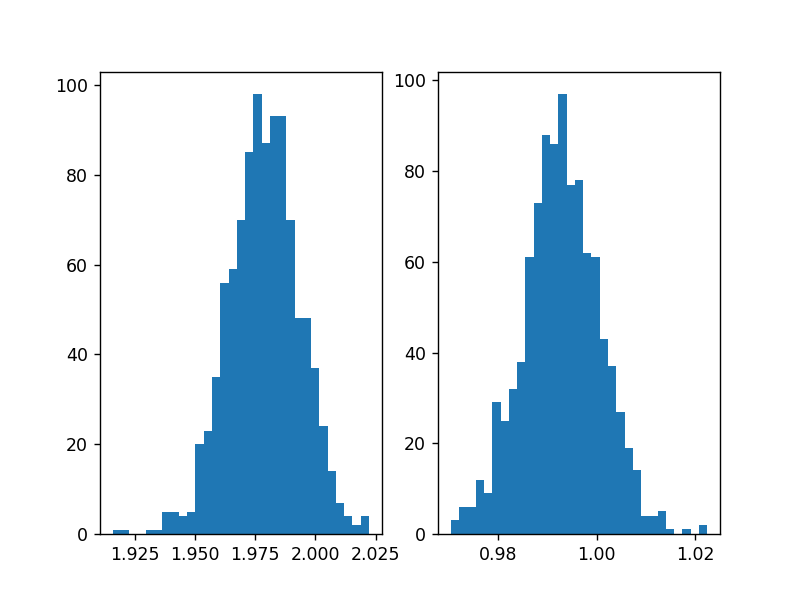

Slope standard deviation: 0.015
Intercept standard deviation: 0.008


In [4]:
plt.figure()
plt.subplot(121)
plt.hist(slopes, bins=int(np.sqrt(iters)))
plt.subplot(122)
plt.hist(intercepts, bins=int(np.sqrt(iters)))

print('Slope standard deviation: %.3f' % np.std(slopes))
print('Intercept standard deviation: %.3f' % np.std(intercepts))

### MCMC METHOD 

In [5]:
def MCMC(ind):
    # parameters for the problem
    Npoint = 100

    # data abscissa {Xi}
    my_problemLR.Xi = np.random.rand(Npoint)
    my_problemLR.sigmad = 0.1 # sec

    slope = 2.
    intercept = 1.

    #  Data value = {Yi}
    my_problemLR.Yi = slope * my_problemLR.Xi + intercept + np.random.randn(Npoint) * my_problemLR.sigmad
    X0 = np.array([10., 10.])
    # set the step Dernier param : 'Gaus' ou autre
    step = np.array([0.01, 0.01])# *2 or *5 or *10

    niter = 100000


    mout, mMAP, accrate = mcmc(my_problemLR.logprior, my_problemLR.loglikelyhood,
                               densities.generate, densities.logproposal, X0, niter, step, ind)
    x=mout[:,0]
    y=mout[:,1]

    burning_period = int(0.2*niter)
    a = mout[burning_period:-1,0]
    b = mout[burning_period:-1,1]

    a=a[0:-1:200]
    b=b[0:-1:200]
    return a,b

In [6]:
n = 100000
Tot = ['Gaus', 'Exp']
t = []
for i in Tot:
    t.append(MCMC(i))

In [7]:
ag, bg = t[0]
ae, be = t[1]

<IPython.core.display.Javascript object>


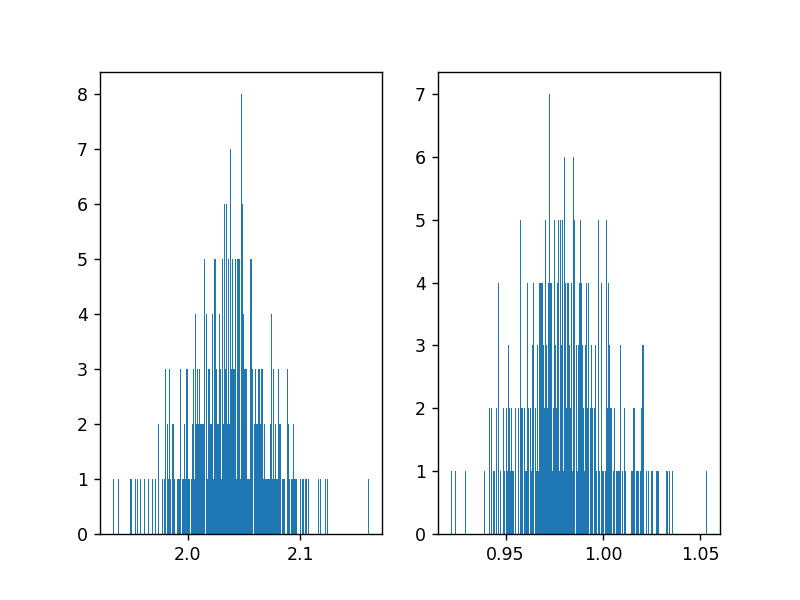

Slope standard deviation: 0.034
Intercept standard deviation: 0.021


In [8]:
plt.figure()
plt.subplot(121)
plt.hist(ag, bins=int(np.sqrt(n)))
plt.subplot(122)
plt.hist(bg, bins=int(np.sqrt(n)))

print('Slope standard deviation: %.3f' % np.std(ag))
print('Intercept standard deviation: %.3f' % np.std(bg))

<IPython.core.display.Javascript object>


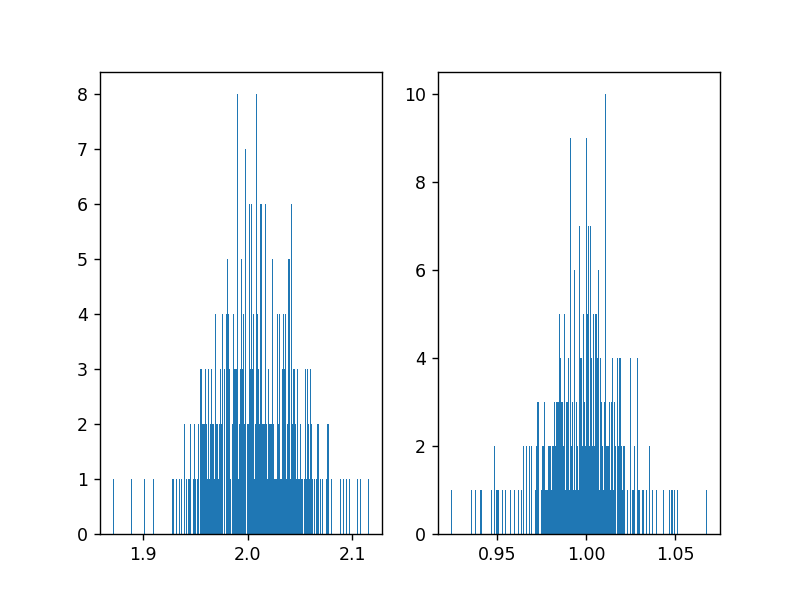

Slope standard deviation: 0.038
Intercept standard deviation: 0.021


In [9]:
plt.figure()
plt.subplot(121)
plt.hist(ae, bins=int(np.sqrt(n)))
plt.subplot(122)
plt.hist(be, bins=int(np.sqrt(n)))

print('Slope standard deviation: %.3f' % np.std(ae))
print('Intercept standard deviation: %.3f' % np.std(be))

<IPython.core.display.Javascript object>


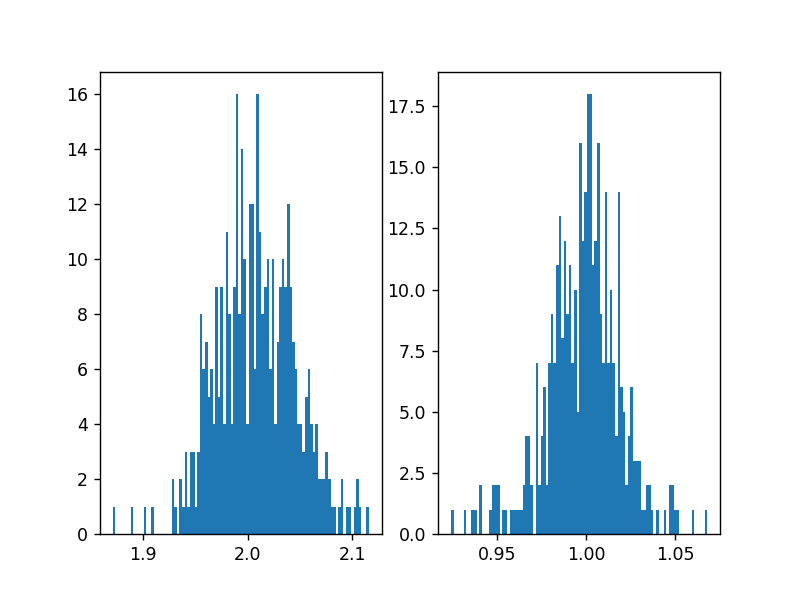

Slope standard deviation: 0.038
Intercept standard deviation: 0.021


In [10]:
plt.figure()
plt.subplot(121)
plt.hist(ae, bins=100)
plt.subplot(122)
plt.hist(be, bins=100)

print('Slope standard deviation: %.3f' % np.std(ae))
print('Intercept standard deviation: %.3f' % np.std(be))